# Post-Covid Economic Data (Life after Covid)

*What changes after covid? Analysis revealing economic trends post-pandemic.*

## Goal

*The goal of analyzing this dataset is to gain comprehensive insights into the economic trajectories of nine major economies from the onset of the COVID-19 pandemic through the beginning of 2024. This involves identifying trends and patterns in crucial economic indicators such as manufacturing and services performance, consumer sentiment, interest rates, inflation rates, unemployment rates, and GDP growth. Additionally, the analysis aims to assess the impact of the pandemic and other significant events on these economies, conduct comparative analysis among the included countries, utilize predictive modeling techniques to forecast future economic scenarios, analyze financial market data for market reactions and investor sentiments, draw insights for policymakers and stakeholders, and effectively communicate findings through clear visualizations to facilitate understanding and decision-making processes.*

## Setup

#### Importing the necessary libraries I will use for this project



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

#### Reading in the data

In [8]:
from google.colab import files
uploaded = files.upload()



Saving economic data.csv to economic data.csv


In [9]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['economic data.csv']))

#### Looking at the data

In [10]:
df2.head(10)

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75%,2.20%,1.70%,5.20%,1.20%,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75%,2.20%,1.70%,5.10%,1.20%,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50%,2.20%,1.70%,5.20%,1.20%,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25%,-0.30%,1.20%,6.30%,-6.10%,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25%,-0.30%,1.20%,7.00%,-6.10%,audusd,0.6511,0.6684,0.6371,0.6666
5,australia,2020-06-01,51.2,53.1,93.7,0.25%,-0.30%,1.20%,7.40%,-6.10%,audusd,0.6657,0.7063,0.6646,0.6902
6,australia,2020-07-01,54.0,58.2,87.9,0.25%,0.70%,1.10%,7.50%,-3.20%,audusd,0.6903,0.7229,0.6877,0.7142
7,australia,2020-08-01,53.6,49.0,79.5,0.25%,0.70%,1.10%,6.80%,-3.20%,audusd,0.7146,0.7404,0.7075,0.7375
8,australia,2020-09-01,55.4,50.8,93.9,0.25%,0.70%,1.10%,6.90%,-3.20%,audusd,0.7377,0.7415,0.7006,0.7161
9,australia,2020-10-01,54.2,53.7,105.0,0.25%,0.90%,1.10%,7.00%,-0.40%,audusd,0.7163,0.7244,0.7002,0.7026


## Data Cleaning!

### Checking for missing data

In [39]:
# Let's loop through the data and see if there is anything missing

for col in df2.columns:
    percent_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

country - 0%
date - 0%
manufacturing pmi - 0%
services pmi - 0%
consumer confidence - 0%
interest rates - 0%
cpi yoy - 0%
core cpi - 0%
unemployment rate - 0%
gdp yoy - 0%
ticker - 0%
open - 0%
high - 0%
low - 0%
close - 0%


####  Dropping duplicates

In [12]:
df2.drop_duplicates()


,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75%,2.20%,1.70%,5.20%,1.20%,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75%,2.20%,1.70%,5.10%,1.20%,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50%,2.20%,1.70%,5.20%,1.20%,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25%,-0.30%,1.20%,6.30%,-6.10%,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25%,-0.30%,1.20%,7.00%,-6.10%,audusd,0.6511,0.6684,0.6371,0.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,united states,2023-08-01,47.6,54.5,71.2,5.50%,3.70%,4.30%,3.80%,2.90%,dxy,101.8700,104.4500,101.7400,103.6200
428,united states,2023-09-01,49.0,53.6,67.7,5.50%,3.70%,4.10%,3.80%,2.90%,dxy,103.6200,106.8400,103.2700,106.2200
429,united states,2023-10-01,46.7,51.8,63.8,5.50%,3.20%,4.00%,3.90%,3.10%,dxy,106.1700,107.3500,105.3600,106.6600
430,united states,2023-11-01,46.7,52.5,61.3,5.50%,3.10%,4.00%,3.70%,3.10%,dxy,106.6700,107.1100,102.4700,103.5000


#### Checking the data type of the columns

In [13]:
print(df2.dtypes)

country                 object
date                    object
manufacturing pmi      float64
services pmi           float64
consumer confidence    float64
interest rates          object
cpi yoy                 object
core cpi                object
unemployment rate       object
gdp yoy                 object
ticker                  object
open                   float64
high                   float64
low                    float64
close                  float64
dtype: object


#### Changing the data type of columns

In [16]:
# Get the list of categorical columns
cat_cols = df2.select_dtypes(include='object').columns.tolist()

# Create a DataFrame containing counts of unique values for each categorical column
cat_df2 = pd.DataFrame(df2[cat_cols].melt(var_name='column', value_name='value')
                      .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])

# Display summary statistics of categorical variables
display(df2[cat_cols].describe())

# Display counts of unique values for each categorical column
display(cat_df2)

,country,date,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker
count,432,432,432,432,432,432,432,432
unique,9,48,46,107,83,78,88,9
top,australia,2020-01-01,0.25%,1.50%,1.10%,3.60%,0.60%,audusd
freq,48,9,77,14,18,22,15,48


count
column            value        
core cpi          3.90%       1
                  6.40%       1
                  -0.80%      1
                  0.10%       1
                  4.60%       1
...                         ...
unemployment rate 5.20%      15
                  2.60%      16
                  3.90%      16
                  4.00%      19
                  3.60%      22

[468 rows x 1 columns]

In [17]:
df2.describe(include='O').T

,count,unique,top,freq
country,432,9,australia,48
date,432,48,2020-01-01,9
interest rates,432,46,0.25%,77
cpi yoy,432,107,1.50%,14
core cpi,432,83,1.10%,18
unemployment rate,432,78,3.60%,22
gdp yoy,432,88,0.60%,15
ticker,432,9,audusd,48


In [18]:
# Inspect useless features
df2.nunique().sort_values()

country                  9
ticker                   9
interest rates          46
date                    48
unemployment rate       78
core cpi                83
gdp yoy                 88
cpi yoy                107
manufacturing pmi      204
services pmi           219
consumer confidence    320
low                    418
close                  426
open                   427
high                   428
dtype: int64

#### Country Distribution


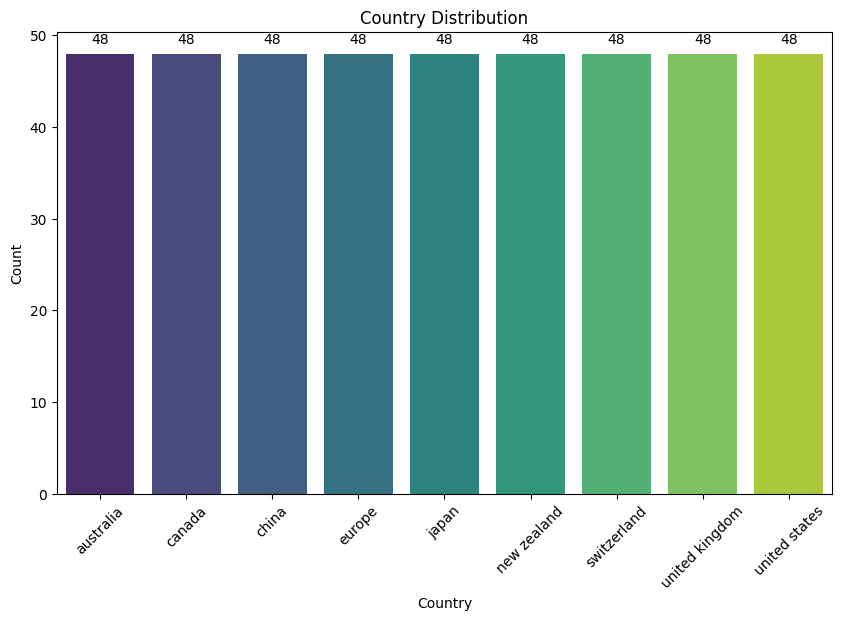

In [19]:
# Histogram of Country Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='country', data=df2, palette='viridis')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

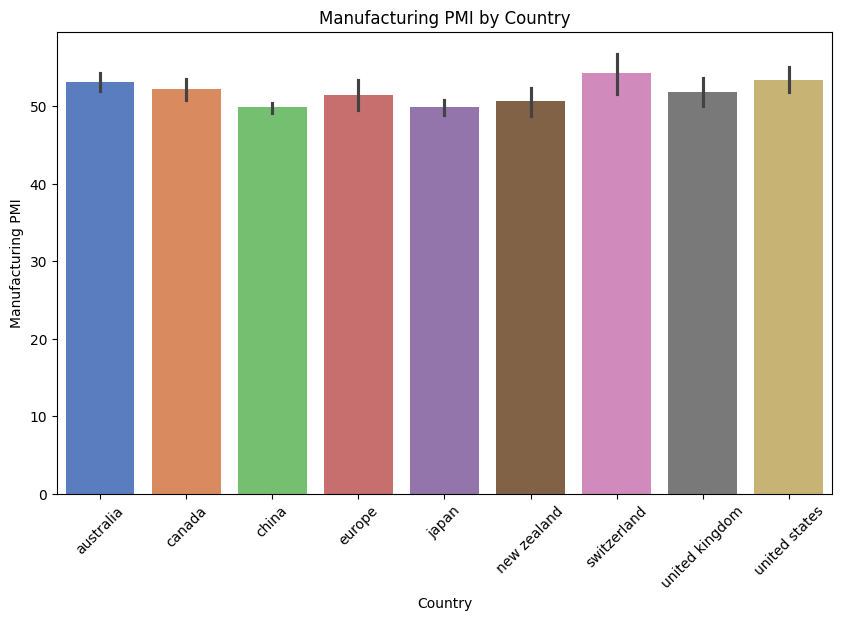

In [29]:
# Bar Plot of Manufacturing PMI by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='manufacturing pmi', data=df2, palette='muted')
plt.title('Manufacturing PMI by Country')
plt.xlabel('Country')
plt.ylabel('Manufacturing PMI')
plt.xticks(rotation=45)
plt.show()

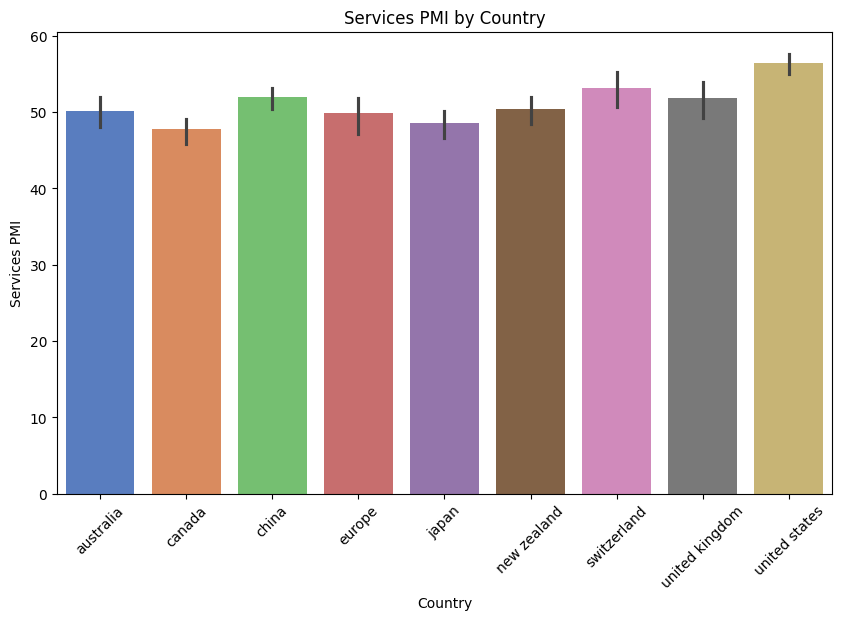

In [20]:
# Bar Plot of Services PMI by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='services pmi', data=df2, palette='muted')
plt.title('Services PMI by Country')
plt.xlabel('Country')
plt.ylabel('Services PMI')
plt.xticks(rotation=45)
plt.show()

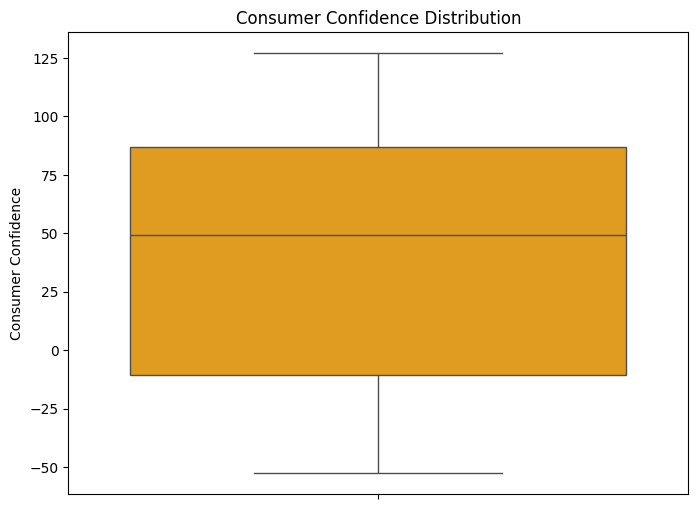

In [24]:
# Box Plot of Consumer Confidence
plt.figure(figsize=(8, 6))
sns.boxplot(y='consumer confidence', data=df2, color='orange')
plt.title('Consumer Confidence Distribution')
plt.ylabel('Consumer Confidence')
plt.show()

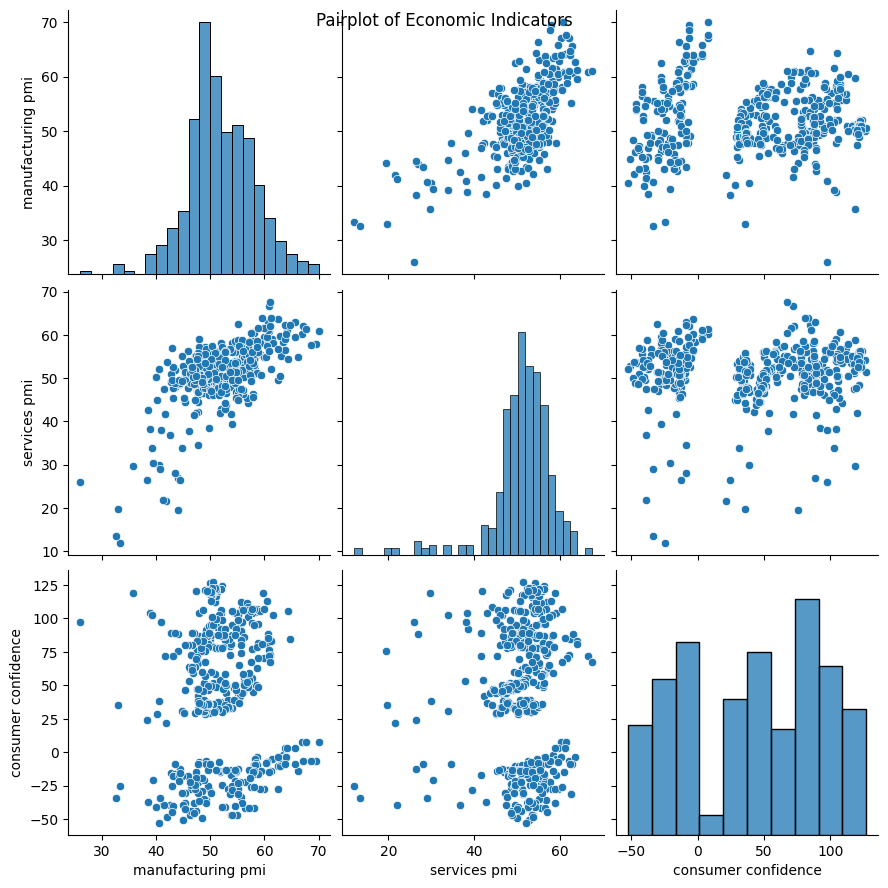

In [25]:
# Pairplot of Select Economic Indicators
sns.pairplot(df2[['manufacturing pmi', 'services pmi', 'consumer confidence', 'unemployment rate']], height=3)
plt.suptitle('Pairplot of Economic Indicators')
plt.show()

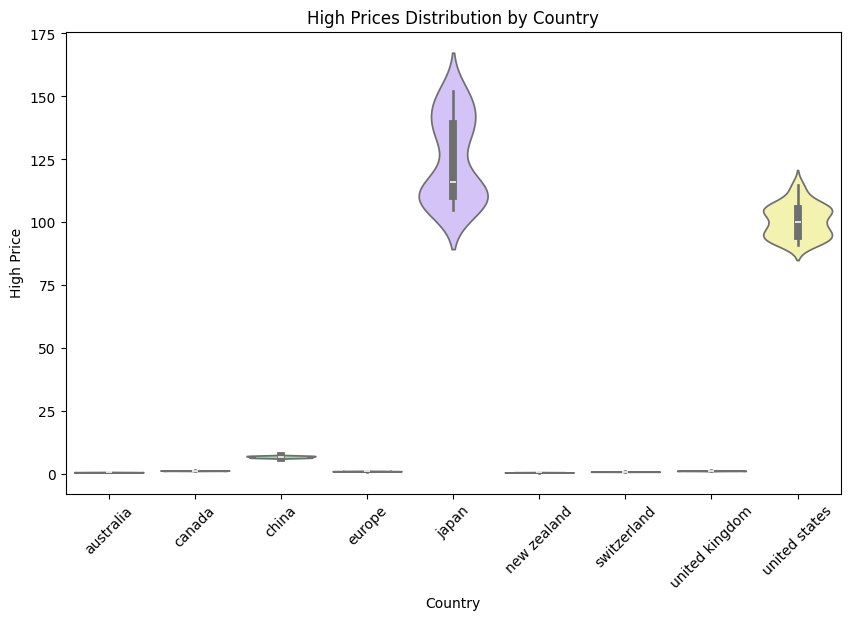

In [26]:
# Violin Plot of High Prices by Country
plt.figure(figsize=(10, 6))
sns.violinplot(x='country', y='high', data=df2, palette='pastel')
plt.title('High Prices Distribution by Country')
plt.xlabel('Country')
plt.ylabel('High Price')
plt.xticks(rotation=45)
plt.show()

#### Univariate Analysis

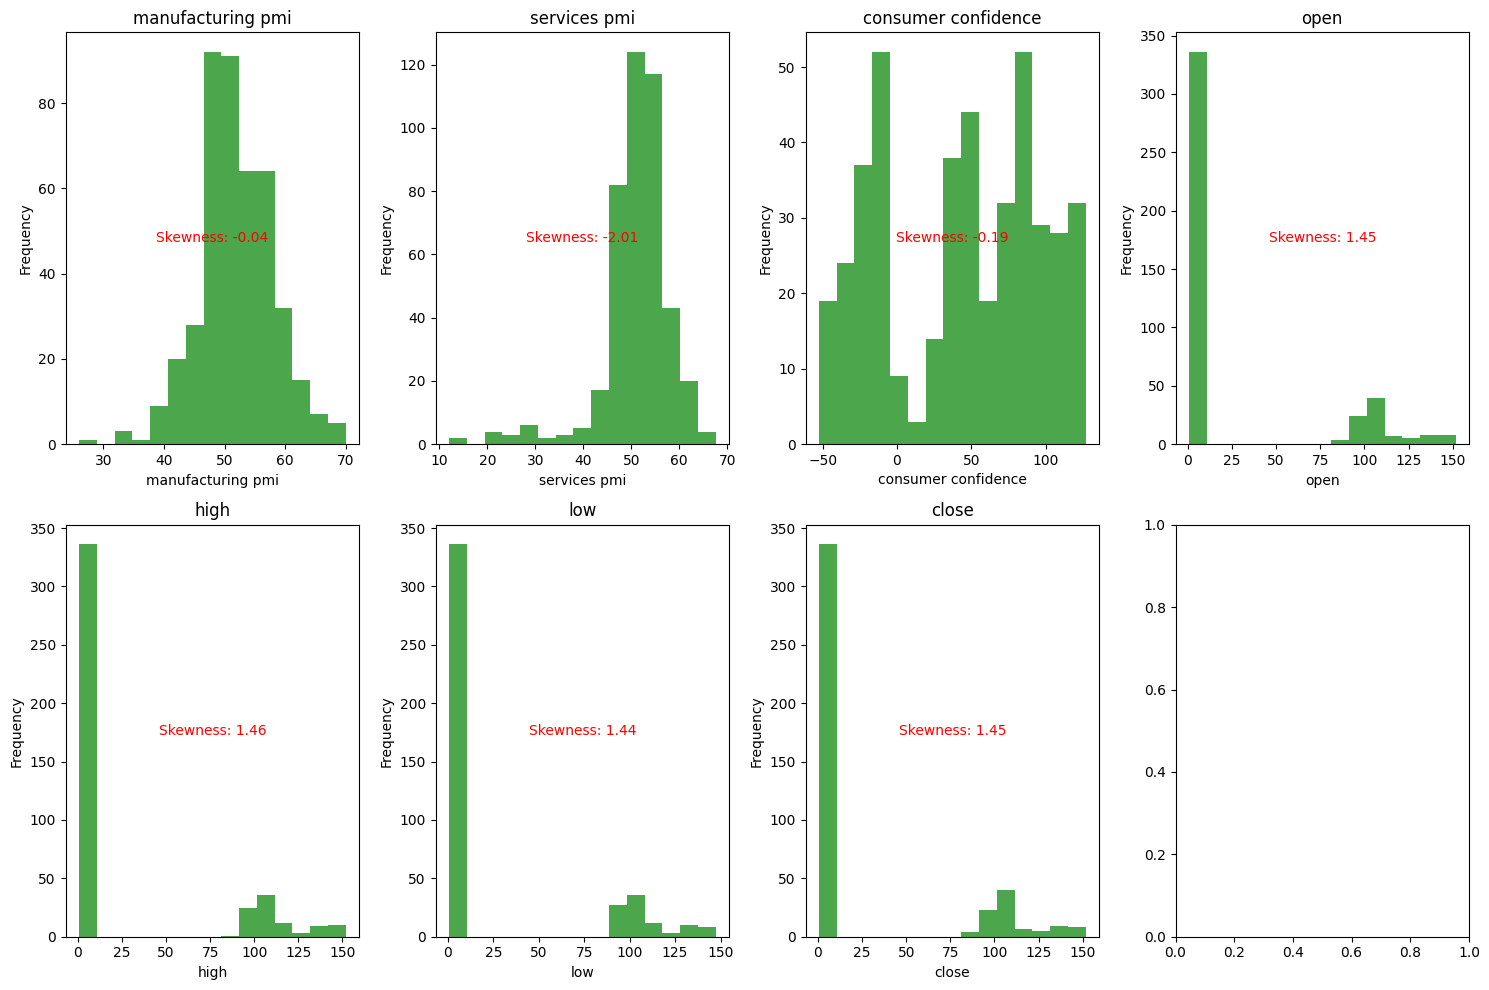

Skewness:
manufacturing pmi     -0.043420
services pmi          -2.009291
consumer confidence   -0.191718
open                   1.449178
high                   1.455121
low                    1.440927
close                  1.451232
dtype: float64


In [22]:
# Calculate skewness for numerical columns
skewness = df2.select_dtypes(include=['int64', 'float64']).skew()

# Count the number of numerical columns
num_cols_count = len(df2.select_dtypes(include=['int64', 'float64']).columns)

# Determine the layout for subplots
num_rows = (num_cols_count + 3) // 4  # Adjust the number of columns in each row
num_cols = min(4, num_cols_count)  # Maximum of 4 columns in each row

# Plot histograms for numerical columns to visualize distributions and identify anomalies
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = df2.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            axes[i, j].hist(df2[col], bins=15, color='green', alpha=0.7)
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Frequency')

            # Compute skewness
            skew_val = skewness[col]

            # Plot skewness value in the center of plot
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness:")
print(skewness)

#### Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix')

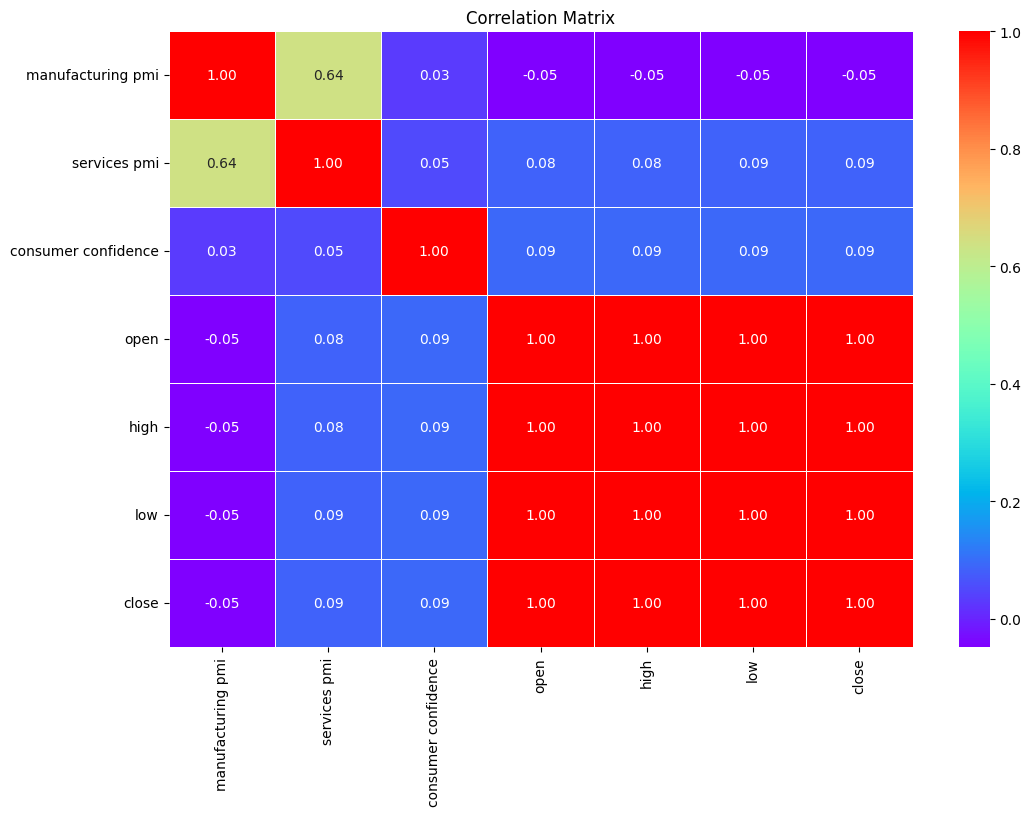

In [23]:
# Correlation matrix

# Select only the numeric columns from the DataFrame
numeric_columns = df2.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

#### Removing Outliers

Number of outliers removed: 120


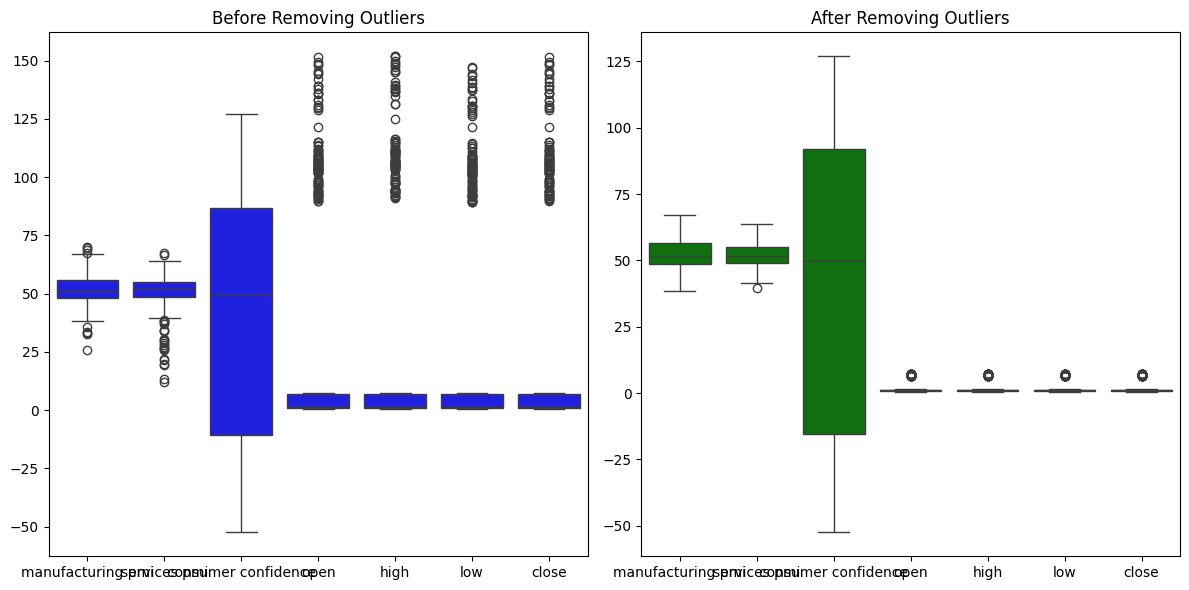

Number of outliers removed: 120


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df2 = ...

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df2):
    # Select only numeric columns
    numeric_df2 = df2.select_dtypes(include=['int64', 'float64'])

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = numeric_df2.quantile(0.25)
    Q3 = numeric_df2.quantile(0.75)

    # Interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = ((numeric_df2 < lower_bound) | (numeric_df2 > upper_bound)).any(axis=1)

    # Count the number of outliers removed
    num_outliers_removed = outliers.sum()

    # Filter DataFrame based on rows without outliers
    df2_no_outliers = df2[~outliers]

    return df2_no_outliers, num_outliers_removed

# Remove outliers using IQR method and get the number of outliers removed
df2_no_outliers, num_outliers_removed = remove_outliers_iqr(df2)

print("Number of outliers removed:", num_outliers_removed)

# Function to plot boxplots before and after removing outliers
def plot_boxplots_before_after(df2_before, df2_after):
    # Set up the figure
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Boxplot before removing outliers (blue color)
    sns.boxplot(data=df2_before, ax=axes[0], color='blue')
    axes[0].set_title('Before Removing Outliers')

    # Boxplot after removing outliers (green color)
    sns.boxplot(data=df2_after, ax=axes[1], color='green')
    axes[1].set_title('After Removing Outliers')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot boxplots before and after outlier removal
plot_boxplots_before_after(df2, df2_no_outliers)
print("Number of outliers removed:", num_outliers_removed)